## Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
df = pd.read_csv('YourCabs.csv')

In [3]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


## Verifying the loaded Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

### Correcting data types of IDs and Timestamp

In [5]:
df['id'] = df['id'].astype(str)
df['user_id'] = df['user_id'].astype(str)
df['vehicle_model_id'] = df['vehicle_model_id'].astype(str)
df['from_area_id'] = df['from_area_id'].astype(str)
df['from_date'] = pd.to_datetime(df['from_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   43431 non-null  object        
 1   user_id              43431 non-null  object        
 2   vehicle_model_id     43431 non-null  object        
 3   package_id           7550 non-null   float64       
 4   travel_type_id       43431 non-null  int64         
 5   from_area_id         43431 non-null  object        
 6   to_area_id           34293 non-null  float64       
 7   from_city_id         16345 non-null  float64       
 8   to_city_id           1588 non-null   float64       
 9   from_date            43431 non-null  datetime64[ns]
 10  to_date              25541 non-null  float64       
 11  online_booking       43431 non-null  int64         
 12  mobile_site_booking  43431 non-null  int64         
 13  booking_created      43431 non-

## Data Cleaning

### Missing Value Treatment

In [7]:
df.isna().mean()

id                     0.000000
user_id                0.000000
vehicle_model_id       0.000000
package_id             0.826161
travel_type_id         0.000000
from_area_id           0.000000
to_area_id             0.210403
from_city_id           0.623656
to_city_id             0.963436
from_date              0.000000
to_date                0.411918
online_booking         0.000000
mobile_site_booking    0.000000
booking_created        0.000000
from_lat               0.002141
from_long              0.002141
to_lat                 0.210403
to_long                0.210403
Car_Cancellation       0.000000
dtype: float64

In [8]:
# Dropping columns having more than 10% of missing values and id and user_id columns as it is of not much use
df = df.drop(['id', 'user_id', 'package_id', 'to_area_id', 'from_city_id', 'to_city_id', 'to_date', 'to_lat', 'to_long'], axis = 1)
df.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
0,28,2,83.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,0
1,12,2,1010.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,0
2,12,2,1301.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,0
3,12,2,768.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,0
4,12,2,1365.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,0


## Exploratory Data Analysis

### Converting timestamp to date and time and travel_type_id, Car_Cancellation to categorical columns

In [9]:
df['from_dt'] = df['from_date'].dt.date
df['from_time'] = df['from_date'].dt.time
df['booking_created_dt'] = df['booking_created'].dt.date
df['booking_created_time'] = df['booking_created'].dt.time
df['travel_type_id'] = df['travel_type_id'].map({1:'long distance', 2:'point to point', 3:'hourly rental'})
df['Car_Cancellation'] = df['Car_Cancellation'].map({0:'Not Cancelled',1:'Cancelled'})

In [10]:
df.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,from_dt,from_time,booking_created_dt,booking_created_time
0,28,point to point,83.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,Not Cancelled,2013-01-01,02:00:00,2013-01-01,01:39:00
1,12,point to point,1010.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,Not Cancelled,2013-01-01,09:00:00,2013-01-01,02:25:00
2,12,point to point,1301.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,Not Cancelled,2013-01-01,03:30:00,2013-01-01,03:08:00
3,12,point to point,768.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,Not Cancelled,2013-01-01,05:45:00,2013-01-01,04:39:00
4,12,point to point,1365.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,Not Cancelled,2013-01-01,09:00:00,2013-01-01,07:53:00


In [11]:
df.describe(include = ['object'])

,vehicle_model_id,travel_type_id,from_area_id,Car_Cancellation,from_dt,from_time,booking_created_dt,booking_created_time
count,43431,43431,43431,43431,43431,43431,43431,43431
unique,27,3,599,2,347,96,328,1415
top,12,point to point,393.0,Not Cancelled,2013-09-06,08:00:00,2013-10-31,10:14:00
freq,31859,34292,3858,40299,239,1150,515,75


### Scatterplot of from_lat and from_long and Car_Cancellation

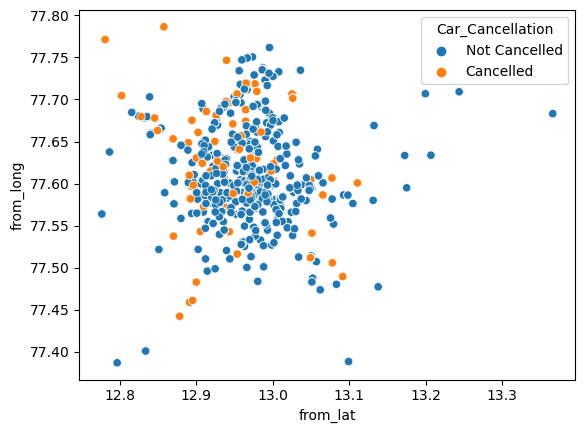

In [12]:
sns.scatterplot(x = df['from_lat'], y = df['from_long'], hue = df['Car_Cancellation'])
plt.show()

There is no clear pattern seen between area and car cancellation

### Vehicle ID vs Car Cancellation

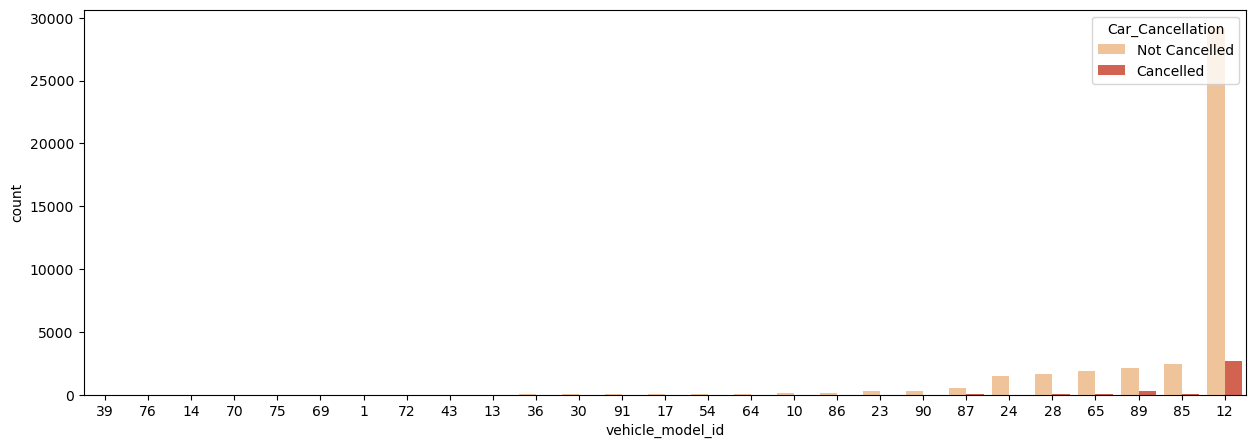

In [13]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'vehicle_model_id', hue = 'Car_Cancellation', data = df, 
              order = df['vehicle_model_id'].value_counts(ascending = True).index, palette = 'OrRd' )
plt.show()

Vehicle ID type 12 dominates the maximum number of bookings hence we can drop vehicle_model_id column

### from time vs Car Cancellation

In [14]:
df['from_time']=pd.to_datetime(df['from_time'],format='%H:%M:%S')

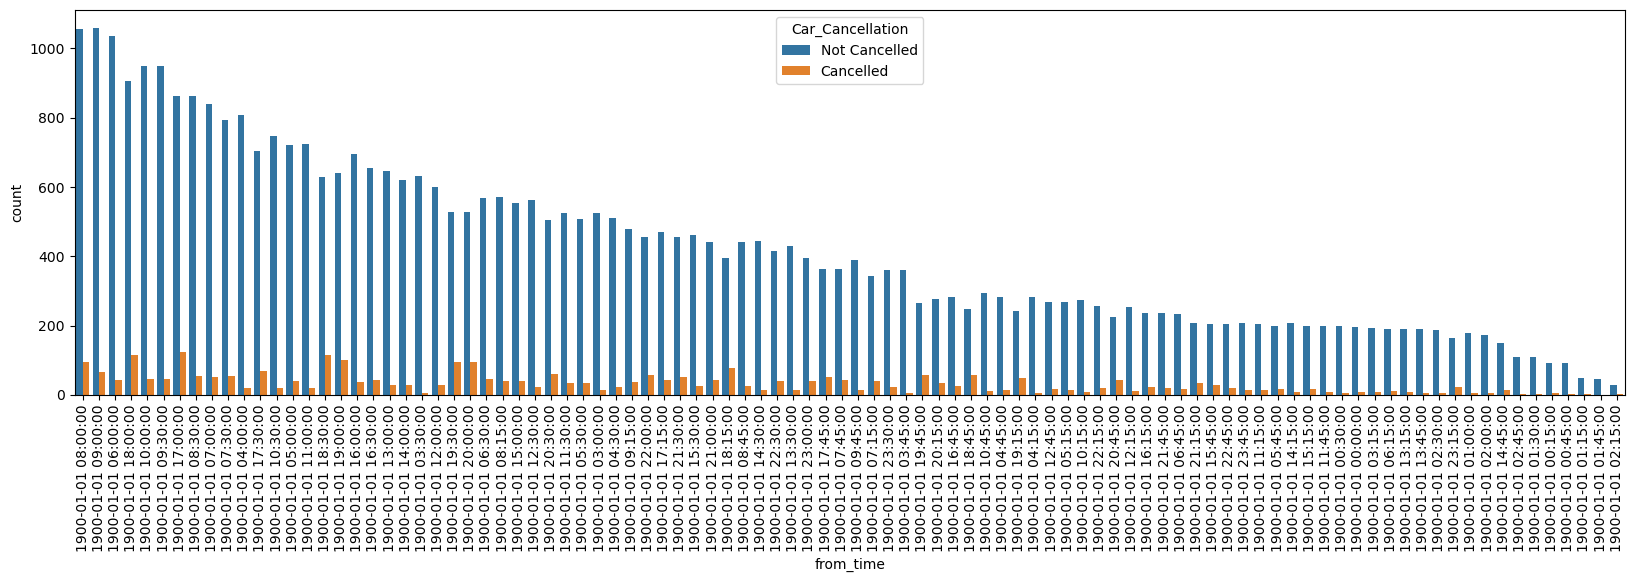

In [15]:
plt.figure(figsize = (20,5))
sns.countplot(x = df['from_time'], hue = df['Car_Cancellation'], 
              order = df['from_time'].value_counts(ascending = False).index, palette = 'tab10' )
plt.xticks(rotation = 90)
plt.show()

Most of the cancellations are when the travel is starting in the evening 5 - 7 pm

### travel type vs Car Cancellation

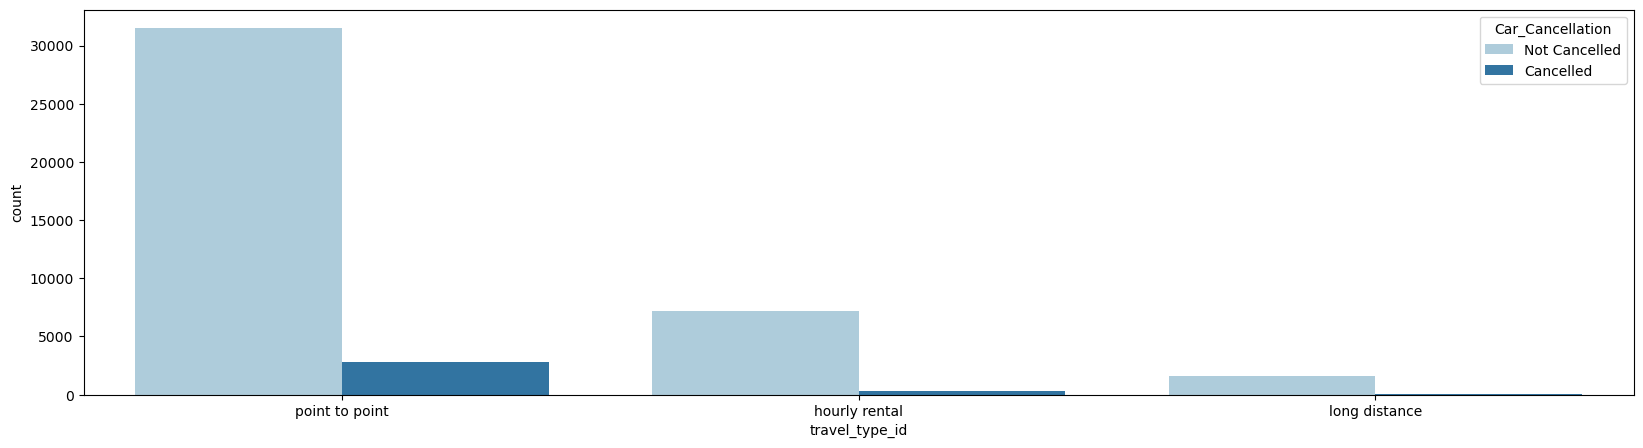

In [16]:
plt.figure(figsize = (20,5))
sns.countplot(x = df['travel_type_id'], hue = df['Car_Cancellation'], 
              order = df['travel_type_id'].value_counts(ascending = False).index, palette = 'Paired' )
plt.show()

Major bookings are point to point types

<AxesSubplot:>

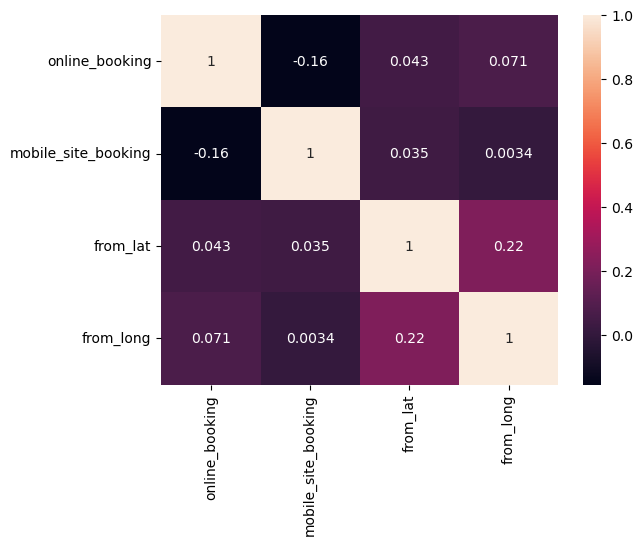

In [17]:
sns.heatmap(df.corr(), annot = True)

### Difference in days between booking and journey day vs Car Cancellation

In [18]:
df['diff_days'] = (df['from_date'] - df['booking_created']) / np.timedelta64(1, 'D')

<AxesSubplot:xlabel='Car_Cancellation', ylabel='diff_days'>

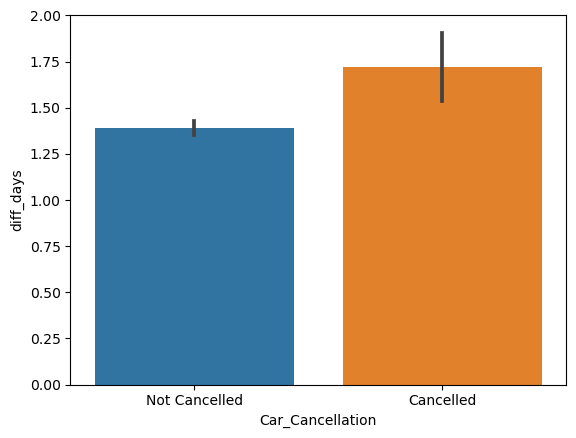

In [19]:
sns.barplot(x = df['Car_Cancellation'], y = df['diff_days'])

Most of the cancellations happen when there is large difference between booking day and journey day

## Dropping unnecessary columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vehicle_model_id      43431 non-null  object        
 1   travel_type_id        43431 non-null  object        
 2   from_area_id          43431 non-null  object        
 3   from_date             43431 non-null  datetime64[ns]
 4   online_booking        43431 non-null  int64         
 5   mobile_site_booking   43431 non-null  int64         
 6   booking_created       43431 non-null  datetime64[ns]
 7   from_lat              43338 non-null  float64       
 8   from_long             43338 non-null  float64       
 9   Car_Cancellation      43431 non-null  object        
 10  from_dt               43431 non-null  object        
 11  from_time             43431 non-null  datetime64[ns]
 12  booking_created_dt    43431 non-null  object        
 13  booking_created_

In [21]:
df = df.drop(['vehicle_model_id', 'from_area_id', 'from_date', 'booking_created', 'from_lat','from_long', 'from_dt',
             'from_time', 'booking_created_dt', 'booking_created_time'], axis = 1)

In [22]:
df.head()

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation,diff_days
0,point to point,0,0,Not Cancelled,0.014583
1,point to point,0,0,Not Cancelled,0.274306
2,point to point,0,0,Not Cancelled,0.015278
3,point to point,0,0,Not Cancelled,0.045833
4,point to point,0,0,Not Cancelled,0.046528


## Data Encoding

In [23]:
df.describe(include = ['object'])

,travel_type_id,Car_Cancellation
count,43431,43431
unique,3,2
top,point to point,Not Cancelled
freq,34292,40299


In [24]:
df['Car_Cancellation'] = df['Car_Cancellation'].map({'Cancelled':1,'Not Cancelled':0})

In [25]:
print(df['travel_type_id'].value_counts())

point to point    34292
hourly rental      7550
long distance      1589
Name: travel_type_id, dtype: int64


In [26]:
Traveltype = pd.get_dummies(df['travel_type_id'])
df['is_point'] = Traveltype['point to point']
df['is_hourly'] = Traveltype['hourly rental']
df = df.drop('travel_type_id',axis=1)

In [27]:
df.head()

,online_booking,mobile_site_booking,Car_Cancellation,diff_days,is_point,is_hourly
0,0,0,0,0.014583,1,0
1,0,0,0,0.274306,1,0
2,0,0,0,0.015278,1,0
3,0,0,0,0.045833,1,0
4,0,0,0,0.046528,1,0


## Extracting Features and Target 

In [28]:
# Features
X = df.drop(['Car_Cancellation'],axis = 1).values
X

array([[0.        , 0.        , 0.01458333, 1.        , 0.        ],
       [0.        , 0.        , 0.27430556, 1.        , 0.        ],
       [0.        , 0.        , 0.01527778, 1.        , 0.        ],
       ...,
       [0.        , 0.        , 0.16319444, 0.        , 1.        ],
       [0.        , 0.        , 0.05347222, 1.        , 0.        ],
       [0.        , 1.        , 0.59027778, 1.        , 0.        ]])

In [29]:
# Target
Y = df.loc[:,'Car_Cancellation'].values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
z = df.loc[:,'Car_Cancellation']
z.value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

## Splitting the data into train and test data

In [31]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.7,random_state=50)

## MLA1 - Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##### Instantiating and fitting the model to training Dataset

In [33]:
log_reg=LogisticRegression(random_state=10)
log_reg.fit(xtrain,ytrain)

LogisticRegression(random_state=10)

##### Prediction of test data

In [34]:
ypred=log_reg.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
ytest

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

##### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest,ypred)
conf_matrix

array([[12084,     1],
       [  945,     0]], dtype=int64)

<AxesSubplot:>

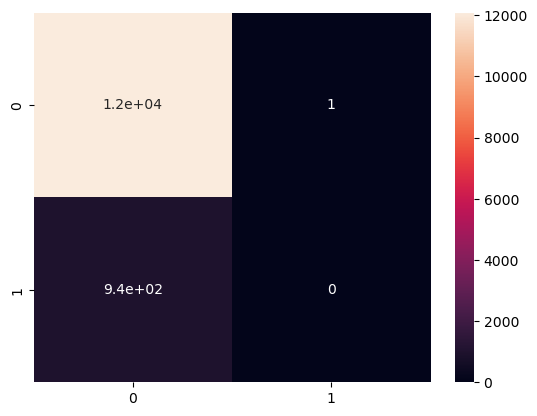

In [37]:
sns.heatmap(conf_matrix, annot = True)

##### Accuracy, Precision, Recall 

In [38]:
print("Accuracy: ", metrics.accuracy_score(ytest,ypred))

Accuracy:  0.9273983115886416


In [39]:
print("Precision: ", metrics.precision_score(ytest,ypred))

Precision:  0.0


In [40]:
print("Recall: ", metrics.recall_score(ytest,ypred))

Recall:  0.0


##### ROC AUC Curve

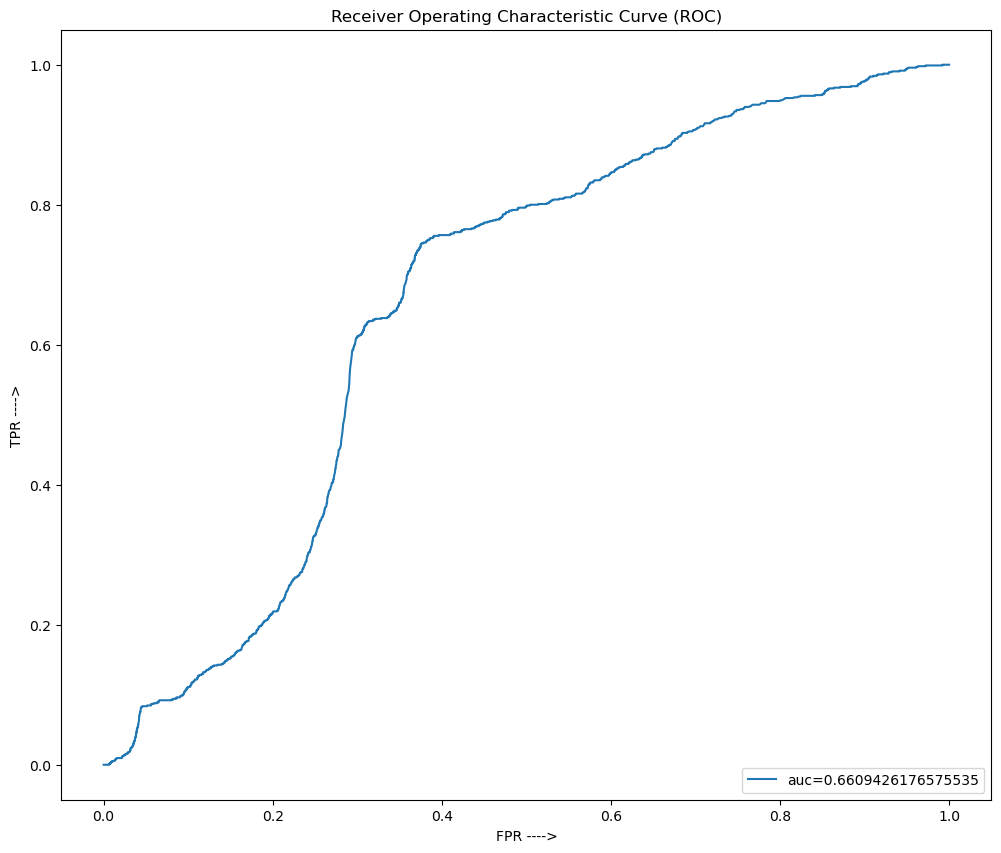

In [41]:
ypred_proba = log_reg.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  ypred_proba)
auc = metrics.roc_auc_score(ytest, ypred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## MLA2 - KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

##### Instantiating and fitting the model to training Dataset

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

##### Prediction of test data

In [45]:
ypred = knn.predict(xtest)

##### Classification Report and Confusion Matrix

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(ytest,ypred))

[[11782   303]
 [  816   129]]


In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12085
           1       0.30      0.14      0.19       945

    accuracy                           0.91     13030
   macro avg       0.62      0.56      0.57     13030
weighted avg       0.89      0.91      0.90     13030



##### ROC AUC curve

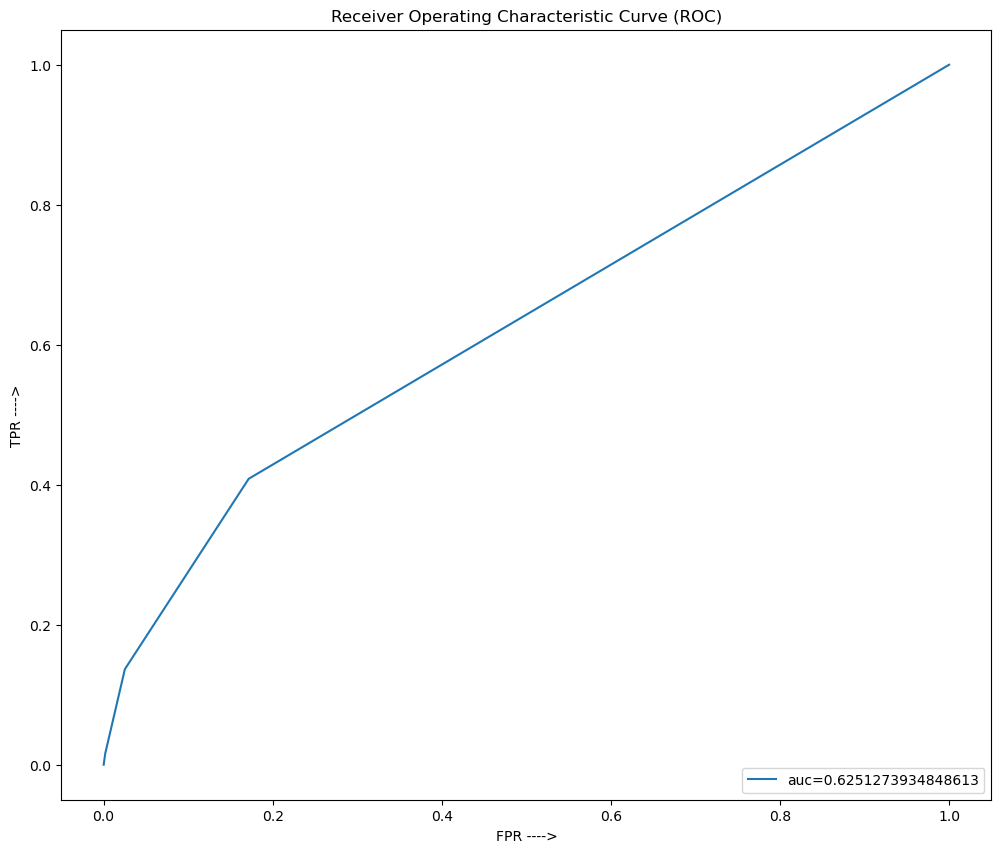

In [48]:
ypred_proba = knn.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  ypred_proba)
auc = metrics.roc_auc_score(ytest, ypred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

##### Choosing K value

In [49]:
accuracy_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

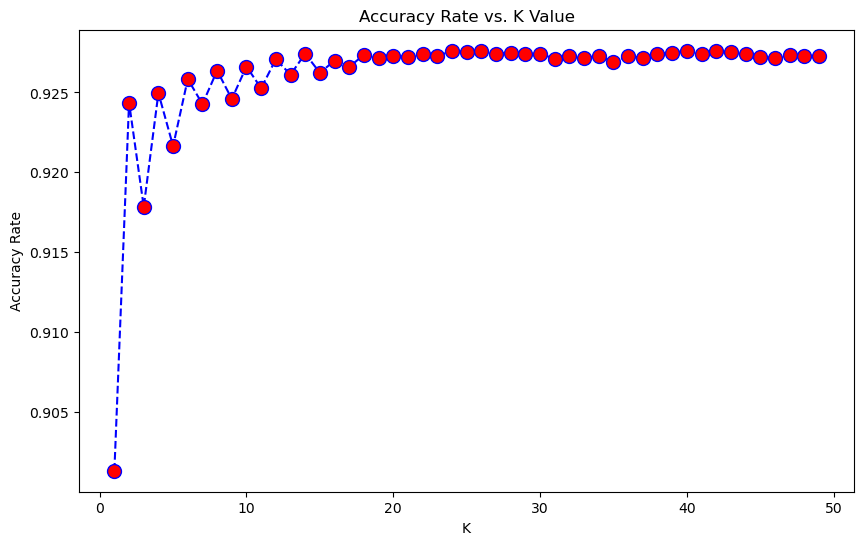

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

##### Trying K = 1 and K = 5

In [51]:
#k = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [53]:
ypred = knn.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[11327   758]
 [  772   173]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12085
           1       0.19      0.18      0.18       945

    accuracy                           0.88     13030
   macro avg       0.56      0.56      0.56     13030
weighted avg       0.88      0.88      0.88     13030



In [54]:
# k = 5
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [56]:
ypred = knn.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[11899   186]
 [  867    78]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     12085
           1       0.30      0.08      0.13       945

    accuracy                           0.92     13030
   macro avg       0.61      0.53      0.54     13030
weighted avg       0.89      0.92      0.90     13030



## MLA3 - Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [58]:
ypred = model.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
conf_matrix = confusion_matrix(ytest,ypred)
conf_matrix

array([[11373,   712],
       [  827,   118]], dtype=int64)

##### Accuracy, Precision, Recall 

In [60]:
Accuracy = metrics.accuracy_score(ytest,ypred)
Precision = metrics.precision_score(ytest,ypred)
Recall = metrics.recall_score(ytest,ypred)
print('Accuracy = {}, Precision = {}, Recall = {}'.format(Accuracy,Precision,Recall))

Accuracy = 0.8818879508825787, Precision = 0.14216867469879518, Recall = 0.12486772486772486


##### ROC AUC curve

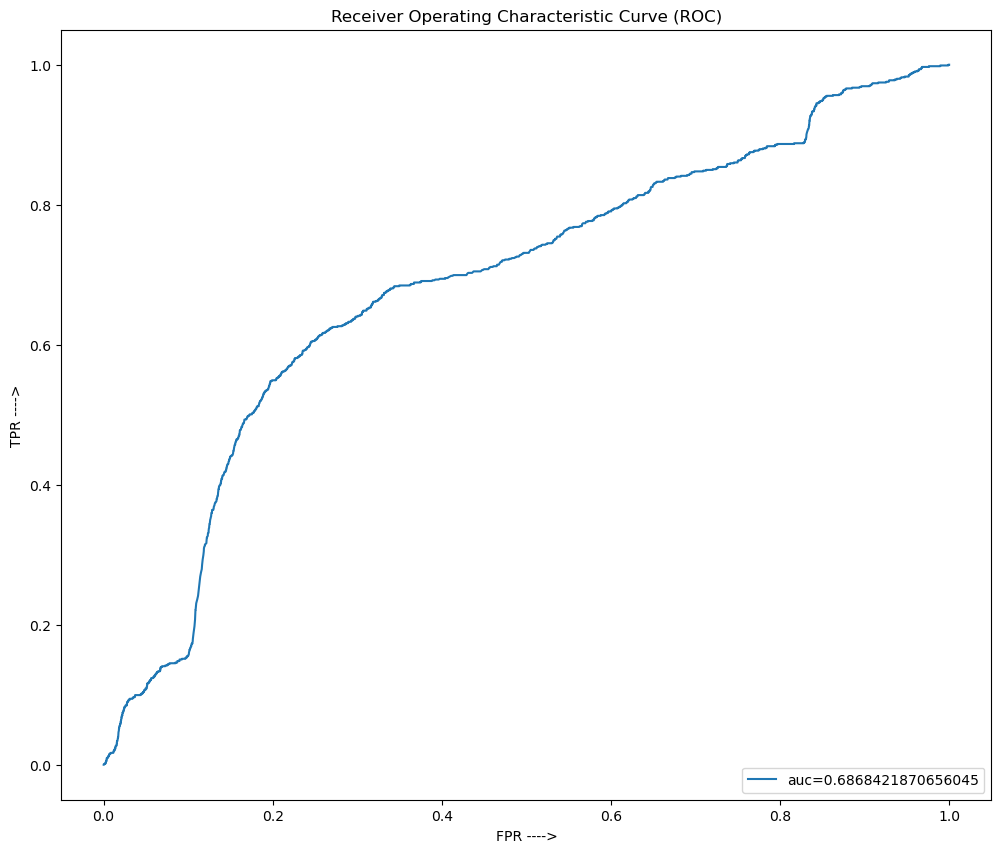

In [61]:
ypred_proba = model.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  ypred_proba)
auc = metrics.roc_auc_score(ytest, ypred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## MLA4 - Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

##### Decision Tree with Gini

###### Decision Tree Depth - 2

In [63]:
model1 = DecisionTreeClassifier(random_state=1,max_depth=2)
model1.fit(xtrain,ytrain)
model1_score_train = model1.score(xtrain,ytrain)
model1_score_test = model1.score(xtest,ytest)
print('Training Score',model1_score_train)
print('Testing Score',model1_score_test)

Training Score 0.9280615769218118
Testing Score 0.9274750575594781


##### Performance Metrics

##### Area under the curve

In [64]:
from sklearn.metrics import roc_curve, auc
ypred = model1.predict_proba(xtest)[:,1]
fpr,tpr,_=roc_curve(ytest,ypred)
roc_auc = auc(fpr,tpr)

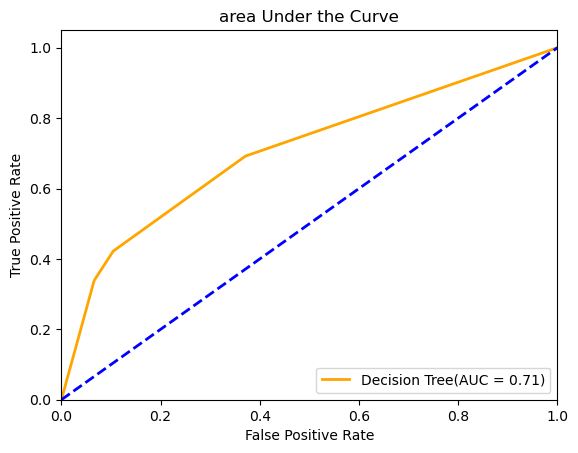

In [65]:
plt.figure(1)
lw=2
plt.plot(fpr,tpr,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix and Classification report

In [66]:
ypred = model1.predict(xtest)

In [67]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[12085     0]
 [  945     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12085
           1       0.00      0.00      0.00       945

    accuracy                           0.93     13030
   macro avg       0.46      0.50      0.48     13030
weighted avg       0.86      0.93      0.89     13030



##### Decision Tree Depth - 20

In [68]:
model2 = DecisionTreeClassifier(random_state=1,max_depth=20)
model2.fit(xtrain,ytrain)
model2_score_train = model2.score(xtrain,ytrain)
model2_score_test = model2.score(xtest,ytest)
print('Training Score',model2_score_train)
print('Testing Score',model2_score_test)

Training Score 0.9393112068681951
Testing Score 0.9158864159631619


##### Performance Metrics

##### Area under the curve

In [69]:
ypred = model2.predict_proba(xtest)[:,1]
fpr,tpr,_=roc_curve(ytest,ypred)
roc_auc = auc(fpr,tpr)

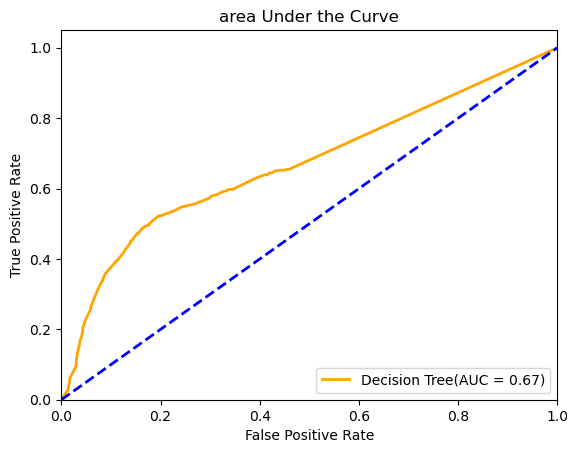

In [70]:
plt.figure(1)
lw=2
plt.plot(fpr,tpr,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc="lower right")
plt.show()

##### Classification report and Confusion Matrix

In [71]:
ypred = model2.predict(xtest)

In [72]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[11875   210]
 [  886    59]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     12085
           1       0.22      0.06      0.10       945

    accuracy                           0.92     13030
   macro avg       0.57      0.52      0.53     13030
weighted avg       0.88      0.92      0.89     13030



##### Decision Tree with Entropy

##### Decision Tree with depth -20

In [73]:
model3 = DecisionTreeClassifier(random_state=5,max_depth=20,criterion = 'entropy')
model3.fit(xtrain,ytrain)
model3_score_train = model3.score(xtrain,ytrain)
model3_score_test = model3.score(xtest,ytest)
print('Training Score',model3_score_train)
print('Testing Score',model3_score_test)

Training Score 0.9378638860563797
Testing Score 0.917344589409056


##### Performance Metrics

##### Area under the curve

In [74]:
ypred = model3.predict_proba(xtest)[:,1]
fpr,tpr,_=roc_curve(ytest,ypred)
roc_auc = auc(fpr,tpr)

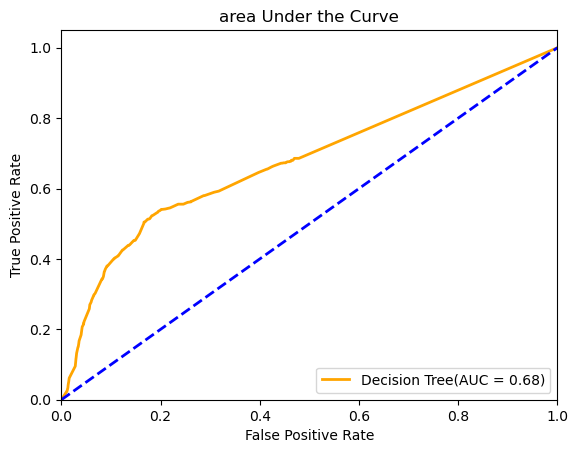

In [75]:
plt.figure(1)
lw=2
plt.plot(fpr,tpr,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc="lower right")
plt.show()

##### Classification Report and Confusion Matrix

In [76]:
ypred = model3.predict(xtest)

In [77]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[11895   190]
 [  887    58]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     12085
           1       0.23      0.06      0.10       945

    accuracy                           0.92     13030
   macro avg       0.58      0.52      0.53     13030
weighted avg       0.88      0.92      0.89     13030



##### Graphical representation of tree

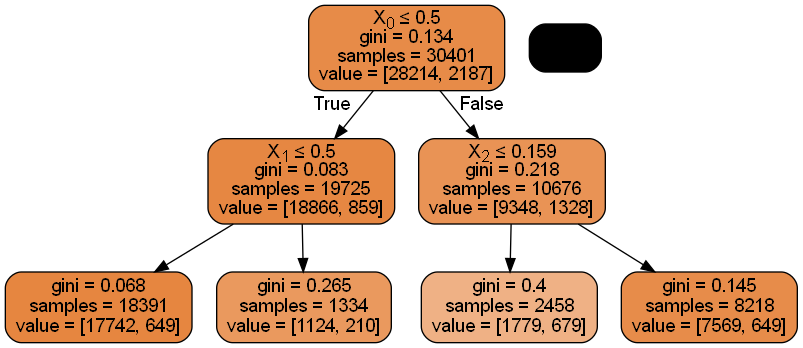

<Figure size 1000x800 with 0 Axes>

In [78]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model1,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## MLA5 - Random Forest

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen

In [80]:
rf = RandomForestClassifier(random_state=40)

##### Hyperparameter Optimization Using GridSearchCV

In [81]:
np.random.seed(40)

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(xtrain,ytrain)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}


In [82]:
rf.set_params(criterion='gini',max_features = 'auto',max_depth = 2)

RandomForestClassifier(max_depth=2, random_state=40)

##### Training the Random Forest

In [83]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, random_state=40)

##### Prediction

In [84]:
ypred = rf.predict(xtest)

##### Classification Report and Confusion Matrix

In [85]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[12085     0]
 [  945     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12085
           1       0.00      0.00      0.00       945

    accuracy                           0.93     13030
   macro avg       0.46      0.50      0.48     13030
weighted avg       0.86      0.93      0.89     13030



## MLA6 - SVM

In [86]:
from sklearn.svm import SVC
svc = SVC()

In [87]:
svc.fit(xtrain,ytrain)

SVC()

##### Prediction

In [88]:
ypred = svc.predict(xtest)

##### Classification Report and Confusion Matrix

In [89]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[12085     0]
 [  945     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12085
           1       0.00      0.00      0.00       945

    accuracy                           0.93     13030
   macro avg       0.46      0.50      0.48     13030
weighted avg       0.86      0.93      0.89     13030



##### ROC AUC curve

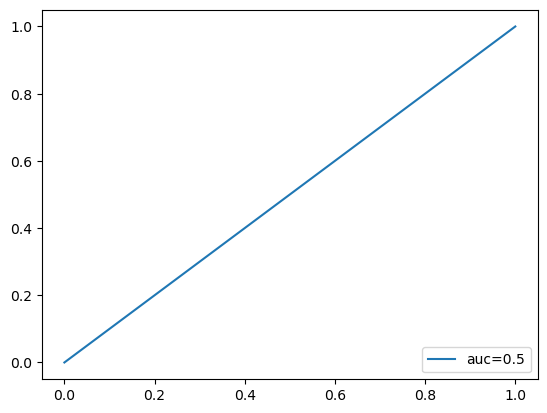

In [90]:
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(ytest,ypred)
auc = roc_auc_score(ytest,ypred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

From the above algorithms, MLA2 (k = 3) fits the data best with Accuracy = 0.91, F1 score = 0.19 and AUC = 0.62. Though the model is not good enough to be deployed.